In [4]:
import os
import pandas as pd

In [24]:
from utils import CLASS_NAME_TO_ID, visualize

In [21]:
CLASS_NAME_TO_ID

{'Bus': 0, 'Truck': 1}

In [6]:
data_dir = "./Detection/"
data_df = pd.read_csv(os.path.join(data_dir, "df.csv"))
data_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,fff2b15ad6007d0e,activemil,Truck,1,0.277344,0.622656,0.226389,0.859722,0,0,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
24058,fff376d20410e4c9,xclick,Bus,1,0.295625,0.558750,0.306667,0.397500,1,0,...,1,0,0.424375,0.316250,0.295625,0.558750,0.306667,0.397500,0.382500,0.335833
24059,fff376d20410e4c9,xclick,Bus,1,0.348125,0.701250,0.423333,0.744167,0,0,...,1,0,0.478750,0.493125,0.348125,0.701250,0.423333,0.744167,0.537500,0.523333
24060,fffde5953a818927,xclick,Bus,1,0.277500,0.605625,0.565000,0.795833,0,0,...,0,0,0.488125,0.277500,0.517500,0.605625,0.565000,0.670000,0.795833,0.704167


In [7]:
index = 0
image_files = [fn for fn in os.listdir("./Detection/images/") if fn.endswith("jpg")]
image_file = image_files[index]
image_file

'63908fdf1f3d13fe.jpg'

In [8]:
image_path = os.path.join("./Detection/images/", image_file)
image_path

'./Detection/images/63908fdf1f3d13fe.jpg'

In [5]:
import cv2
import matplotlib.pyplot as plt

In [10]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

(192, 256, 3)


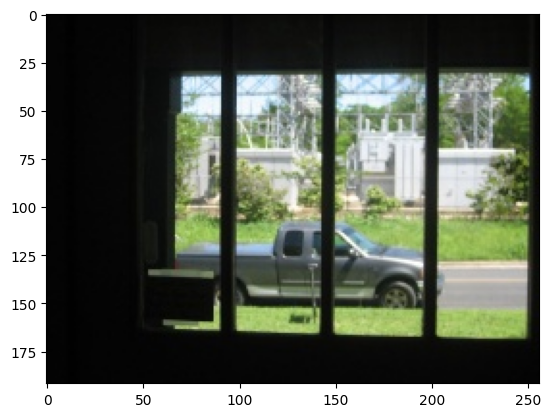

In [11]:
plt.imshow(image)

In [12]:
image_id = image_file.split('.')[0]
image_id

'63908fdf1f3d13fe'

In [14]:
meta_data = data_df[data_df['ImageID'] == image_id]
meta_data

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
10070,63908fdf1f3d13fe,xclick,Truck,1,0.259375,0.813125,0.549167,0.799167,1,0,...,0,0,0.50875,0.259375,0.386875,0.813125,0.549167,0.659167,0.799167,0.723333


In [15]:
cate_names = meta_data['LabelName'].values
cate_names

array(['Truck'], dtype=object)

In [16]:
bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values
bboxes

array([[0.259375, 0.813125, 0.549167, 0.799167]])

In [22]:
img_h, img_w, img_c = image.shape

class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names ]
class_ids

[1]

In [25]:
unnorm_bboxes = bboxes.copy()
unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]]
unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2] # xmax, ymax = xmax-xmin, ymax-ymin => xmax=w, ymax=h
unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2) # xmin, ymin -> x_cen, y_cen = x_min + w/2, y_min + h/2

# (x_cen, w) / image_w
# (y_cen, h) / image_h
unnorm_bboxes[:, [0,2]] *= img_w
unnorm_bboxes[:, [1,3]] *= img_h

In [26]:
canvas = visualize(image, unnorm_bboxes, class_ids)

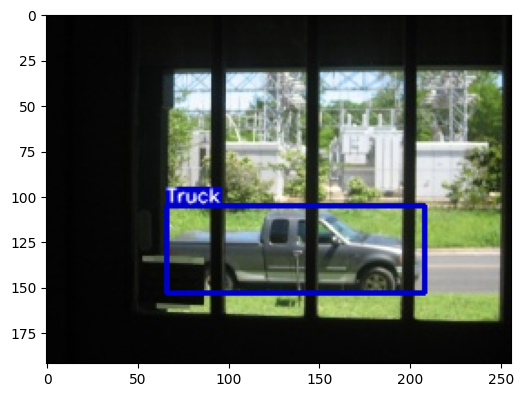

In [28]:
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [50]:
from ipywidgets import interact

In [31]:
@interact(index=(0, len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join("./Detection/images/", image_file)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_id = image_file.split('.')[0]
    meta_data = data_df[data_df['ImageID'] == image_id]
    cate_names = meta_data['LabelName'].values
    bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values

    img_h, img_w, _ = image.shape

    class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names ]
    unnorm_bboxes = bboxes.copy()
    unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]]
    unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2]
    unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2)
    unnorm_bboxes[:, [0,2]] *= img_w
    unnorm_bboxes[:, [1,3]] *= img_h

    canvas = visualize(image, unnorm_bboxes, class_ids)

    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=15224), Output()), _dom_classes=('widget-int…

## 2. Object Detection 데이터셋 구축과 연산을 위한 텐서변환 모듈

In [1]:
import torch
import numpy as np

In [32]:
class Detection_dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.data_dir = data_dir
        self.phase = phase
        self.data_df = pd.read_csv(os.path.join(self.data_dir, 'df.csv'))
        self.image_files = [fn for fn in os.listdir(os.path.join(self.data_dir, phase)) if fn.endswith('jpg')]
        self.transformer = transformer

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        # input : image
        # target : label (box, class_id)
        # get_image -> filename(imageid) -> get_label
        filename, image = self.get_image(index)
        bboxes, class_ids = self.get_label(filename)
        img_h, img_w, _ = image.shape

        if self.transformer:
            image = self.transformer(image)
            # image shape: (H,W,C)
            # tensor shape: (C,H,W)
            _, img_h, img_w = image.shape

        bboxes[:, [0,2]] *= img_w
        bboxes[:, [1,3]] *= img_h
        # bboxes = [[xmin, ymin, xmax, ymax]]

        target = {}
        target['boxes'] = torch.Tensor(bboxes).float()
        target['labels'] = torch.Tensor(class_ids).long()

        return image, target, filename

    def get_image(self, index):
        filename = self.image_files[index]
        image_path = os.path.join(self.data_dir, self.phase, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return filename, image

    def get_label(self, filename):
        image_id = filename.split('.')[0]
        meta_data = self.data_df[self.data_df['ImageID'] == image_id]
        cate_names = meta_data['LabelName'].values
        class_ids = np.array([CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names])
        bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values
        bboxes[:, [1,2]] = bboxes[:, [2,1]]
        return bboxes, class_ids

In [33]:
data_dir = "./Detection/"
dataset = Detection_dataset(data_dir=data_dir, phase='train', transformer=None)

In [34]:
len(dataset)

13703

In [35]:
image, target, filename = dataset[0]

In [36]:
image.shape

(192, 256, 3)

In [37]:
target

{'boxes': tensor([[ 66.4000, 105.4401, 208.1600, 153.4401]]),
 'labels': tensor([1])}

In [38]:
filename

'63908fdf1f3d13fe.jpg'

In [40]:
dataset.data_df.iloc[0]

ImageID        0000599864fd15b3
Source                   xclick
LabelName                   Bus
Confidence                    1
XMin                    0.34375
XMax                    0.90875
YMin                   0.156162
YMax                   0.650047
IsOccluded                    1
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
XClick1X               0.421875
XClick2X                0.34375
XClick3X                  0.795
XClick4X                0.90875
XClick1Y               0.156162
XClick2Y                 0.5127
XClick3Y               0.650047
XClick4Y               0.457197
Name: 0, dtype: object

In [52]:
index = 100
image, target, filename = dataset[index]

In [53]:
target

{'boxes': tensor([[ 26.7200,  29.7600, 230.4000, 158.0799],
         [224.8000,  25.7601, 255.8400, 114.3999],
         [230.4000,  74.7201, 255.8400, 124.9599]]),
 'labels': tensor([0, 0, 0])}

In [54]:
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()

n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

In [55]:
bboxes

array([[128.56    ,  93.91997 , 203.68    , 128.31995 ],
       [240.32    ,  70.08    ,  31.039993,  88.63987 ],
       [243.12    ,  99.84    ,  25.440002,  50.239876]], dtype=float32)

In [56]:
canvas = visualize(image, bboxes, class_ids)

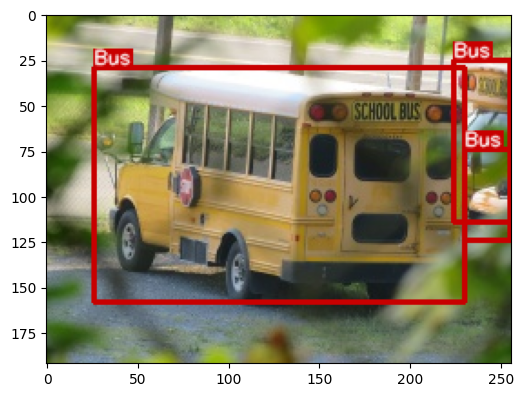

In [57]:
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [51]:
@interact(index=(0, len(dataset)-1))
def show_sample(index=0):
    boxes = target['boxes'].numpy()
    class_ids = target['labels'].numpy()

    n_obj = boxes.shape[0]
    bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
    bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
    bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

    canvas = visualize(image, bboxes, class_ids)

    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=13702), Output()), _dom_classes=('widget-int…

In [58]:
from torchvision import transforms

In [59]:
IMAGE_SIZE = 448
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [60]:
transformer

Compose(
    ToTensor()
    Resize(size=(448, 448), interpolation=bilinear, max_size=None, antialias=warn)
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [61]:
data_dir = "./Detection/"
transformed_dataset = Detection_dataset(data_dir=data_dir, phase='train', transformer=transformer)

In [62]:
from torchvision.utils import make_grid

In [63]:
index = 5
image, target, filename = transformed_dataset[index]

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [64]:
image.shape

torch.Size([3, 448, 448])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


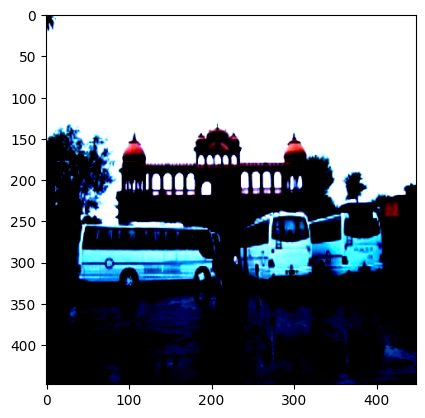

In [65]:
plt.imshow(image.permute(1,2,0).numpy())

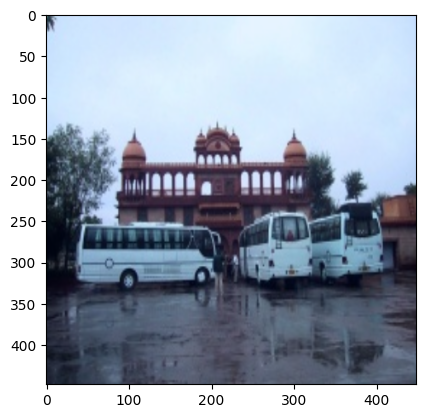

In [66]:
np_image = make_grid(image, normalize=True).permute(1,2,0).numpy()
plt.imshow(np_image)

In [67]:
np_image = make_grid(image, normalize=True).permute(1,2,0).numpy()
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()

In [68]:
n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

In [70]:
canvas = visualize(np_image, bboxes, class_ids)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


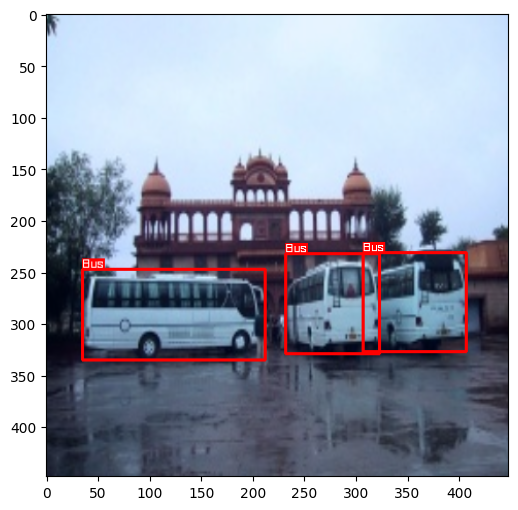

In [71]:
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [72]:
canvas.shape

(448, 448, 3)

In [73]:
from torch.utils.data import DataLoader

In [74]:
def collate_fn(batch):
    image_list = []
    target_list = []
    filename_list = []

    for a, b, c in batch:
        image_list.append(a)
        target_list.append(b)
        filename_list.append(c)

    return image_list, target_list, filename_list

In [75]:
data_dir = "./Detection/"
BATCH_SIZE = 6

trainset = Detection_dataset(data_dir=data_dir, phase='train', transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [ ]:
for index, batch in enumerate(trainloader):
    images = batch[0]
    targets = batch[1]
    filenames = batch[2]

    if index == 0:
        break

In [81]:
def build_dataloader(data_dir, batch_size=4, image_size=448):
    transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    dataloaders = {}
    train_dataset = Detection_dataset(data_dir=data_dir, phase='train', transformer=transformer)
    dataloaders['train'] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    val_dataset = Detection_dataset(data_dir=data_dir, phase='val', transformer=transformer)
    dataloaders['val'] = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

    return dataloaders

In [83]:
data_dir = "./Detection/"
dloaders = build_dataloader(data_dir, batch_size=4, image_size=448)

for phase in ["train", "val"]:
    for index, batch in enumerate(dloaders[phase]):
        images = batch[0]
        targets = batch[1]
        filenames = batch[2]

        print(f"{phase} - {targets}")
        print(f"{phase} - {filenames}")

        if index == 0:
            break


train - [{'boxes': tensor([[ 50.9600,  88.0002, 407.9600, 387.7892],
        [387.8000,  65.6844, 447.7200, 234.1051]]), 'labels': tensor([1, 1])}, {'boxes': tensor([[163.5200, 336.3732, 413.8400, 447.2532],
        [ 28.2800, 309.4932, 182.5600, 402.8268]]), 'labels': tensor([1, 1])}, {'boxes': tensor([[  0.0000,   0.0000, 223.7200, 447.5798],
        [159.6000, 188.2778, 193.4800, 284.0974],
        [223.7200,   0.0000, 413.5600, 366.8892]]), 'labels': tensor([0, 0, 0])}, {'boxes': tensor([[ 25.4800, 173.6367, 379.1200, 391.5260],
        [299.0400, 215.7819, 391.4400, 346.4308]]), 'labels': tensor([1, 1])}]
train - ['20eaac25adea6aed.jpg', 'dca7d32cbad47474.jpg', '091229a79e2a175e.jpg', 'b241b721a5da2cfa.jpg']
val - [{'boxes': tensor([[261.5200, 151.9468, 431.7600, 338.9868],
        [  0.0000, 157.1732,  57.1200, 304.6400],
        [ 54.8800,   0.0000, 245.8400, 337.8668]]), 'labels': tensor([1, 1, 1])}]
val - ['eca6cd40621dfcc5.jpg']


/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in 

## 3. Faster R-CNN 아키텍쳐

In [84]:
from torchvision import models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [85]:
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /Users/jeong-wonseok/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:29<00:00, 5.67MB/s] 


In [86]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [87]:
in_features = model.roi_heads.box_predictor.cls_score.in_features

In [88]:
num_classes = 2
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [89]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [90]:
def build_model(num_classes):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [91]:
NUM_CLASSES = 2
model = build_model(num_classes=NUM_CLASSES)
model

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(